In [120]:
#Importing the Libraries
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [141]:
#Loading the data
titanic = pd.read_csv("D:/CodSoft/Titanic-Dataset.csv")

# EDA

In [11]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [149]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [26]:
titanic= titanic.set_index('PassengerId')


In [142]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [21]:
#Data Cleanning
titanic.isnull()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [144]:
titanic.drop_duplicates(inplace=True)


In [145]:
titanic[['Age','Cabin']].dropna(inplace=True)

In [24]:
titanic.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [64]:
# Function to detect and fix outliers using IQR method for specific columns
def detect_and_fix_outliers(data, columns):
    outliers = {}
    outliers_values = {}
    data_fixed = data.copy()
    
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Detect outliers
        outliers_in_col = data[(data[col] < lower_bound) | (data[col] > upper_bound)].index
        if len(outliers_in_col) > 0:
            outliers[col] = outliers_in_col
            
            # Fix outliers by replacing them with the median value
            median_value = data[col].median()
            data_fixed.loc[outliers_in_col, col] = median_value
    
    return outliers, data_fixed

In [65]:
columns_to_check = ['Age', 'Fare']
outliers, titanic = detect_and_fix_outliers(titanic, columns_to_check)

print("\nColumns with outliers detected and fixed using IQR method:")
for col, indices in outliers.items():
    print(f"{col}: {len(indices)} outliers")


Columns with outliers detected and fixed using IQR method:
Age: 11 outliers
Fare: 116 outliers


In [66]:
#Check the EDit
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.50,891.0
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.00,1.0
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.00,3.0
Age,714.0,29.055560,13.622807,0.42,20.1250,28.0000,37.00,64.0
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.00,8.0
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.00,6.0
Fare,891.0,17.383622,12.713016,0.00,7.9104,14.4542,24.15,65.0


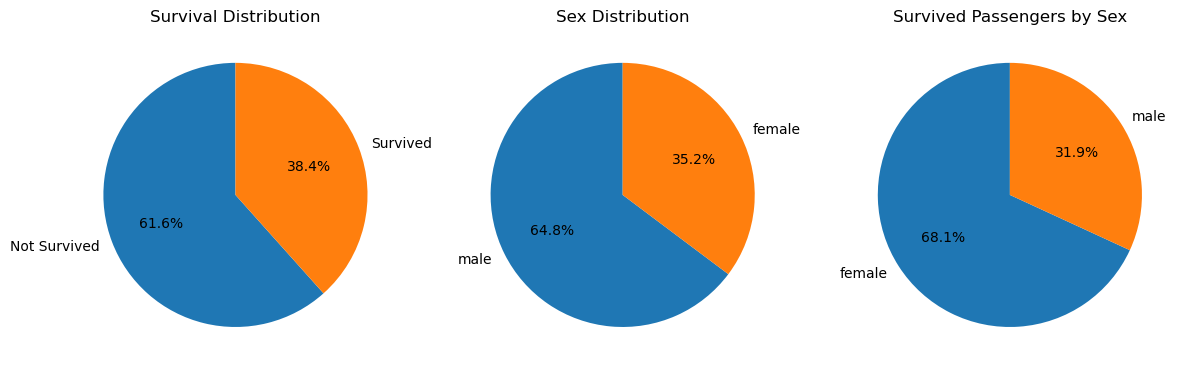

In [78]:
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

# Plot for Survived column
survived_counts = titanic['Survived'].value_counts()
survived_labels = ['Not Survived', 'Survived']
axs[0].pie(survived_counts, labels=survived_labels, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Survival Distribution')

# Plot for Sex column
sex_counts = titanic['Sex'].value_counts()
sex_labels = sex_counts.index
axs[1].pie(sex_counts, labels=sex_labels, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Sex Distribution')



survived_passengers = titanic[titanic['Survived'] == 1]
survived_counts = survived_passengers['Sex'].value_counts()

# Count survived passengers by sex
survived_counts = survived_passengers['Sex'].value_counts()
axs[2].pie(survived_counts, labels=survived_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Survived Passengers by Sex')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

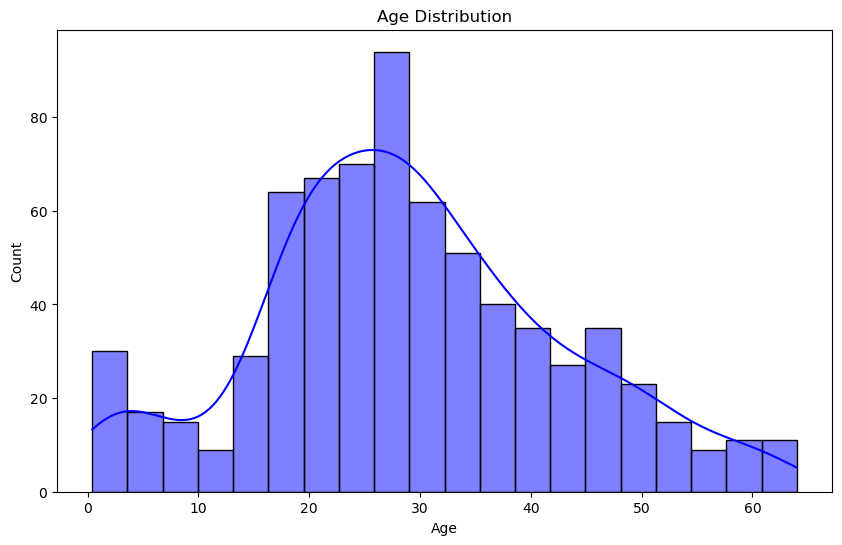

In [80]:
# Plot the age distribution using KDE plot
plt.figure(figsize=(10, 6))
sns.histplot(titanic['Age'].dropna(), kde=True, bins=20, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


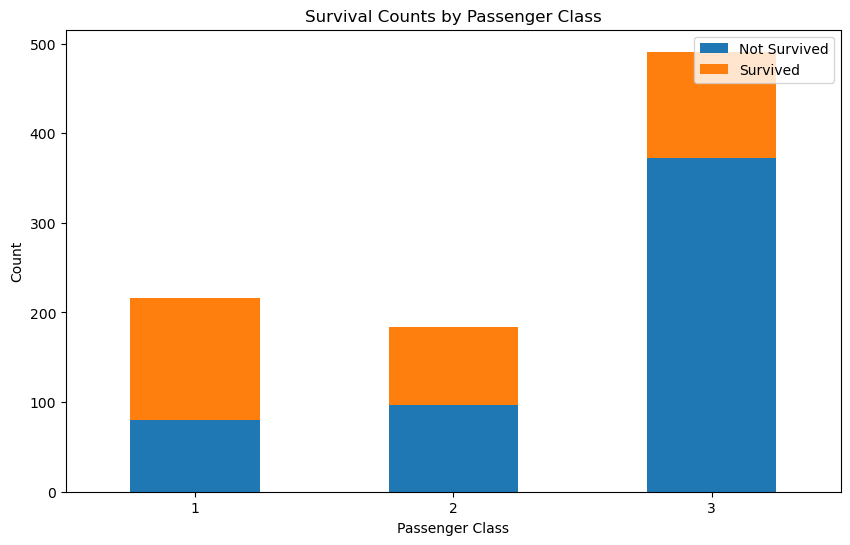

In [82]:
# Group by 'pclass' and 'survived', count occurrences, and reset index
survival_counts = titanic.groupby(['Pclass', 'Survived']).size().reset_index(name='count')

# Pivot the DataFrame to have 'pclass' as index, 'survived' as columns, and 'count' as values
survival_counts_pivot = survival_counts.pivot(index='Pclass', columns='Survived', values='count')

# Plotting the grouped bar plot
survival_counts_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Survival Counts by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['Not Survived', 'Survived'], loc='upper right')
plt.show()

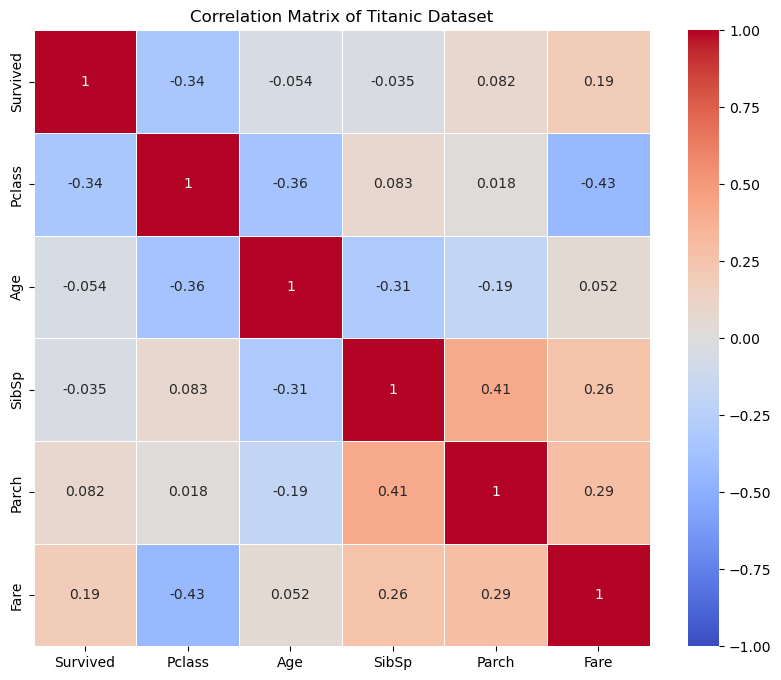

In [85]:
numerical_columns = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Calculate correlation matrix
correlation_matrix = titanic[numerical_columns].corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)
plt.title('Correlation Matrix of Titanic Dataset')
plt.show()

# Data Preprocessing

In [89]:
X = titanic.drop(columns=['Survived'])
y=titanic['Survived']

In [90]:
#Spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [135]:
# Preprocessing pipeline for numerical and categorical features
numeric_features = ['Age', 'Fare', 'SibSp', 'Parch']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_features = ['Sex', 'Embarked', 'Pclass']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Append classifier to preprocessing pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', GradientBoostingClassifier(random_state=42))])

# Gradient Boosting

In [136]:
# Append classifier to preprocessing pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', GradientBoostingClassifier(random_state=42))])

In [137]:
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare', 'SibSp',
                                                   'Parch']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'Embarked',
                                                   'Pclass'])])),
                ('classifier', GradientBoostingClassifier(random_state=42))])

In [115]:
y_pred = clf.predict(X_test)

# Evaluation

In [116]:
print("Accuracy:", accuracy_score(y_test, y_pred))



Accuracy: 0.8100558659217877


In [117]:
print("Classification Report:")
print(classification_report(y_test, y_pred))


nClassification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [118]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

nConfusion Matrix:
[[91 14]
 [20 54]]
